In [1]:
import numpy as np
import os
from sklearn.cluster import DBSCAN
import pandas as pd
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
from haversine import haversine
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
save_dir = r'data\ssusa'
os.makedirs(save_dir, exist_ok=True)

In [3]:
# Define the directory path
data_dir = save_dir

# Define file paths
cluster_file = os.path.join(data_dir, 'Data_Clustered_Cleaned_50km_WithSciName.csv')
df = pd.read_csv(cluster_file)

C:\Users\cliff\AppData\Local\Temp\ipykernel_4868\3086355817.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(cluster_file)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772478 entries, 0 to 772477
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                772478 non-null  int64  
 1   Project             772478 non-null  object 
 2   Camera_Trap_Array   772478 non-null  object 
 3   Deployment_ID       772478 non-null  object 
 4   Sequence_ID         760680 non-null  object 
 5   Start_Time          772478 non-null  object 
 6   End_Time            772478 non-null  object 
 7   Class               772478 non-null  object 
 8   Order               772478 non-null  object 
 9   Family              772478 non-null  object 
 10  Genus               772478 non-null  object 
 11  Species             772478 non-null  object 
 12  Common_Name         772478 non-null  object 
 13  Age                 772478 non-null  object 
 14  Sex                 772478 non-null  object 
 15  Group_Size          772478 non-nul

In [5]:
df.head()

,Year,Project,Camera_Trap_Array,Deployment_ID,Sequence_ID,Start_Time,End_Time,Class,Order,Family,Genus,Species,Common_Name,Age,Sex,Group_Size,Site_Name,Start_Date,End_Date,Survey_Nights,Latitude,Longitude,Habitat,Development_Level,Feature_Type,Cluster_Agglo,Centroid_Latitude,Centroid_Longitude,City_State,Sci_Name
0,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s1,2019-08-31 06:50:00,2019-08-31 06:50:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source,55,59.413873,-136.116876,Haines Borough - Alaska,Ursus arctos
1,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s2,2019-08-31 14:15:00,2019-08-31 14:17:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source,55,59.413873,-136.116876,Haines Borough - Alaska,Ursus arctos
2,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s3,2019-08-31 18:22:00,2019-08-31 18:22:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source,55,59.413873,-136.116876,Haines Borough - Alaska,Ursus arctos
3,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s4,2019-08-31 20:58:00,2019-08-31 20:58:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,adult,female,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source,55,59.413873,-136.116876,Haines Borough - Alaska,Ursus arctos
4,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s4,2019-08-31 20:58:00,2019-08-31 20:58:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,juvenile,unknown,2,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source,55,59.413873,-136.116876,Haines Borough - Alaska,Ursus arctos


In [6]:
# def get_centermost_point(cluster):
#     centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
#     centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
#     return tuple(centermost_point)


In [7]:
# def get_centermost_point(cluster):
#     # Remove duplicate (Latitude, Longitude) pairs
#     unique_points = list(set(cluster))
#     centroid = (MultiPoint(unique_points).centroid.x, MultiPoint(unique_points).centroid.y)
#     centermost_point = min(unique_points, key=lambda point: great_circle(point, centroid).m)
#     return tuple(centermost_point)

In [8]:
# # Group by Cluster_Agglo and collect (Latitude, Longitude) tuples for each cluster
# clusters = df.groupby('Cluster_Agglo')[['Latitude', 'Longitude']].apply(lambda x: list(zip(x['Latitude'], x['Longitude'])))

# # Calculate centermost point for each cluster
# centroids = clusters.apply(get_centermost_point)

# # Convert to DataFrame for easier use
# centroids_df = pd.DataFrame(centroids.tolist(), index=centroids.index, columns=['Latitude_Centroid', 'Longitude_Centroid'])
# centroids_df.reset_index(inplace=True)

In [9]:
# centroids_df.head()

In [10]:
# centroids_df[centroids_df['Cluster_Agglo'] == 156].head()

In [11]:
# # Merge centroids_df onto df based on Cluster_Agglo to add centroid coordinates to each row
# df = df.merge(
#     centroids_df,
#     how='left',
#     on='Cluster_Agglo'
# )

In [12]:
def calculate_distance_to_centroid(row):
    lat1, lon1 = row['Latitude'], row['Longitude']
    lat2, lon2 = row['Centroid_Latitude'], row['Centroid_Longitude']
    return haversine((lat1, lon1), (lat2, lon2), unit='km')

df['Distance_To_Centroid'] = df.apply(calculate_distance_to_centroid, axis=1)

In [13]:
df.describe()

,Year,Group_Size,Survey_Nights,Latitude,Longitude,Cluster_Agglo,Centroid_Latitude,Centroid_Longitude,Distance_To_Centroid
count,772478.000000,772478.000000,772478.000000,772478.000000,772478.000000,772478.000000,772478.000000,772478.000000,772478.000000
mean,2021.407245,1.156324,45.538740,38.445244,-88.375812,82.666889,38.444094,-88.372152,6.439972
std,1.389778,0.871426,19.201009,5.248259,14.433227,62.041390,5.248437,14.429768,6.992601
min,2019.000000,0.000000,1.000000,21.355811,-157.749620,0.000000,21.361755,-157.745430,0.000610
25%,2020.000000,1.000000,31.000000,35.501895,-94.780258,26.000000,35.500754,-94.782846,1.312444
50%,2022.000000,1.000000,46.000000,39.015700,-84.458600,70.000000,39.040430,-84.476388,3.811716
75%,2023.000000,1.000000,60.000000,41.800076,-77.222992,139.000000,41.863913,-77.219461,8.950966
max,2023.000000,169.000000,142.000000,59.452635,-68.611593,210.000000,59.413873,-68.646184,35.612231


In [14]:
min_lon = df['Longitude'].min()
max_lon = df['Longitude'].max()
min_lat = df['Latitude'].min()
max_lat = df['Latitude'].max()

print(f"Longitude range: {min_lon} to {max_lon}")
print(f"Latitude range: {min_lat} to {max_lat}")

Longitude range: -157.74962 to -68.61159314
Latitude range: 21.355811 to 59.452635


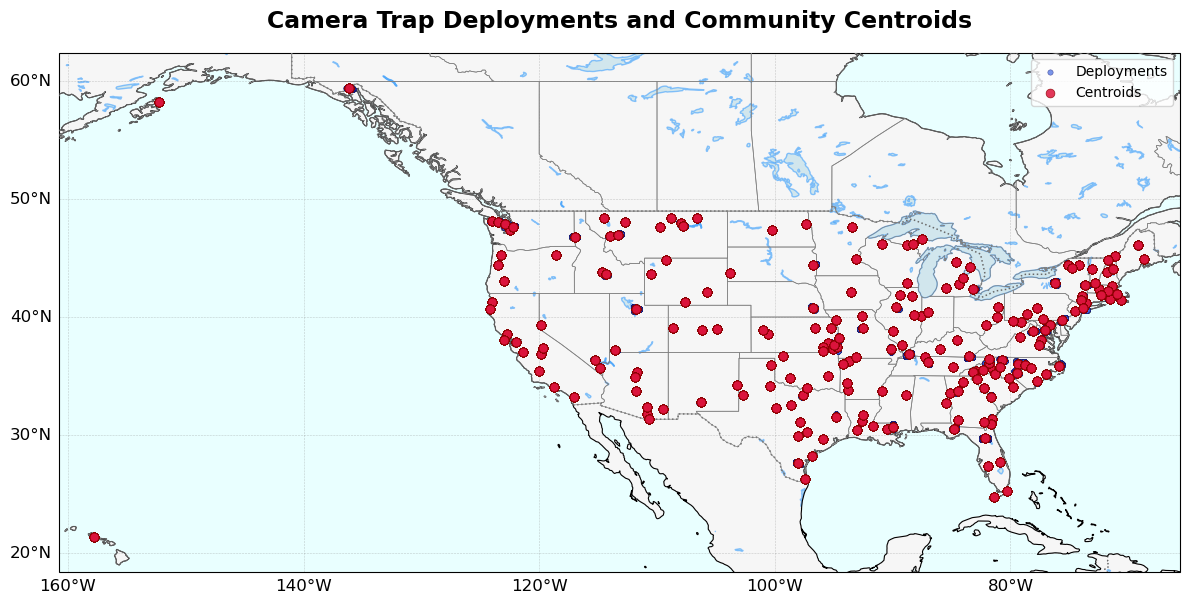

In [15]:
offset = 3
fig = plt.figure(figsize=(12, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([min_lon - offset, max_lon + offset, min_lat - offset, max_lat + offset], crs=ccrs.PlateCarree())

land = cfeature.NaturalEarthFeature(
    'physical', 'land', '50m', edgecolor='face', facecolor='whitesmoke', alpha=0.9)
ocean = cfeature.NaturalEarthFeature(
    'physical', 'ocean', '50m', edgecolor='none', facecolor='lightcyan', alpha=0.7)
lakes = cfeature.NaturalEarthFeature(
    'physical', 'lakes', '50m', edgecolor='dodgerblue', facecolor='lightblue', alpha=0.5)

ax.add_feature(ocean, zorder=0)
ax.add_feature(land, zorder=1)
ax.add_feature(lakes, zorder=2)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='dimgray', linewidth=1.1, zorder=3)
ax.add_feature(cfeature.COASTLINE, edgecolor='k', linewidth=0.8, zorder=3)
ax.add_feature(cfeature.STATES, edgecolor='gray', linestyle='-', linewidth=0.5, zorder=3)

gl = ax.gridlines(
    draw_labels=True, linewidth=0.4, color='gray', alpha=0.4, linestyle='--'
)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'fontsize': 12}
gl.ylabel_style = {'fontsize': 12}

# Plot deployments
ax.scatter(
    df['Longitude'], df['Latitude'],
    c='royalblue', s=15, alpha=0.7,
    transform=ccrs.PlateCarree(),
    edgecolor='midnightblue', linewidth=0.35, zorder=10,
    label='Deployments'
)

# Plot centroids
ax.scatter(
    df['Centroid_Longitude'], df['Centroid_Latitude'],
    c='crimson', s=40, alpha=0.85,
    transform=ccrs.PlateCarree(),
    edgecolor='darkred', linewidth=0.5, zorder=11,
    label='Centroids'
)

plt.title(
    'Camera Trap Deployments and Community Centroids',
    fontsize=17, fontweight='bold', pad=18
)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [16]:
num_clusters = df['Cluster_Agglo'].nunique()
num_unique_deployments = df.drop_duplicates(subset=['Latitude', 'Longitude']).shape[0]
num_unique_camera_arrays = df['Camera_Trap_Array'].nunique()
print(f"Number of unique deployments (by Latitude & Longitude): {num_unique_deployments}")
print(f"Number of clusters: {num_clusters}")
print(f"Number of unique camera trap arrays: {num_unique_camera_arrays}")

Number of unique deployments (by Latitude & Longitude): 7390
Number of clusters: 211
Number of unique camera trap arrays: 262


In [17]:
camera_array_clusters = df.groupby('Camera_Trap_Array')['Cluster_Agglo'].unique()
for array, clusters in camera_array_clusters.items():
    if len(clusters) < 2:
        continue
    print(f"Camera Trap Array: {array}\nCluster IDs: {clusters}\n")


Camera Trap Array: Ahlers
Cluster IDs: [107  36 102 202  26  64  21  25  46]

Camera Trap Array: AustinPeay
Cluster IDs: [182  12]

Camera Trap Array: Elwha
Cluster IDs: [45 74  0]

Camera Trap Array: FortHays
Cluster IDs: [ 69 197]

Camera Trap Array: StLawrence
Cluster IDs: [20 34]



In [18]:
num_clusters = df['Cluster_Agglo'].nunique()
num_unique_deployments = df.drop_duplicates(subset=['Latitude', 'Longitude']).shape[0]
num_unique_camera_arrays = df['Camera_Trap_Array'].nunique()
num_unique_common_sites = df['Camera_Trap_Array'].nunique()
print(f"Number of unique deployments (by Latitude & Longitude): {num_unique_deployments}")
print(f"Number of clusters: {num_clusters}")
print(f"Number of unique camera trap arrays: {num_unique_camera_arrays}")
print(f"Number of unique common sites: {num_unique_common_sites}")

Number of unique deployments (by Latitude & Longitude): 7390
Number of clusters: 211
Number of unique camera trap arrays: 262
Number of unique common sites: 262


In [19]:
df[['Camera_Trap_Array', 'Habitat', 'Development_Level']].drop_duplicates()

,Camera_Trap_Array,Habitat,Development_Level
0,Crupi,forest,wild
533,Fantle-Lepczyk,forest,suburban
1432,Fayetteville,grassland,rural
1668,McDowell,desert,rural
2558,Cienega,grassland,wild
...,...,...,...
749466,Jorge,forest,urban
759324,Gettysburg,forest,rural
765018,AransasNWR,wetland,wild
768918,SUCP,forest,urban


In [20]:
df['Common_Site_Name'] = df[['Camera_Trap_Array', 'Habitat', 'Development_Level']].agg('_'.join, axis=1)
df[['Camera_Trap_Array', 'Habitat', 'Development_Level', 'Common_Site_Name']].drop_duplicates()

,Camera_Trap_Array,Habitat,Development_Level,Common_Site_Name
0,Crupi,forest,wild,Crupi_forest_wild
533,Fantle-Lepczyk,forest,suburban,Fantle-Lepczyk_forest_suburban
1432,Fayetteville,grassland,rural,Fayetteville_grassland_rural
1668,McDowell,desert,rural,McDowell_desert_rural
2558,Cienega,grassland,wild,Cienega_grassland_wild
...,...,...,...,...
749466,Jorge,forest,urban,Jorge_forest_urban
759324,Gettysburg,forest,rural,Gettysburg_forest_rural
765018,AransasNWR,wetland,wild,AransasNWR_wetland_wild
768918,SUCP,forest,urban,SUCP_forest_urban


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772478 entries, 0 to 772477
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Year                  772478 non-null  int64  
 1   Project               772478 non-null  object 
 2   Camera_Trap_Array     772478 non-null  object 
 3   Deployment_ID         772478 non-null  object 
 4   Sequence_ID           760680 non-null  object 
 5   Start_Time            772478 non-null  object 
 6   End_Time              772478 non-null  object 
 7   Class                 772478 non-null  object 
 8   Order                 772478 non-null  object 
 9   Family                772478 non-null  object 
 10  Genus                 772478 non-null  object 
 11  Species               772478 non-null  object 
 12  Common_Name           772478 non-null  object 
 13  Age                   772478 non-null  object 
 14  Sex                   772478 non-null  object 
 15  